In [1]:
import pandas as pd

df = pd.read_csv("../data/marketing_campaign.csv", sep="\t")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Convert date column properly
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Create Age
df["Age"] = 2024 - df["Year_Birth"]


In [3]:
df["Total_Spending"] = (
    df["MntWines"] +
    df["MntFruits"] +
    df["MntMeatProducts"] +
    df["MntFishProducts"] +
    df["MntSweetProducts"] +
    df["MntGoldProds"]
)


In [4]:
df[["Income", "Age", "Total_Spending","Recency"]].head()


,Income,Age,Total_Spending,Recency
0,58138.0,67,1617,58
1,46344.0,70,27,38
2,71613.0,59,776,26
3,26646.0,40,53,26
4,58293.0,43,422,94


Customer Income vs Spending Distribution


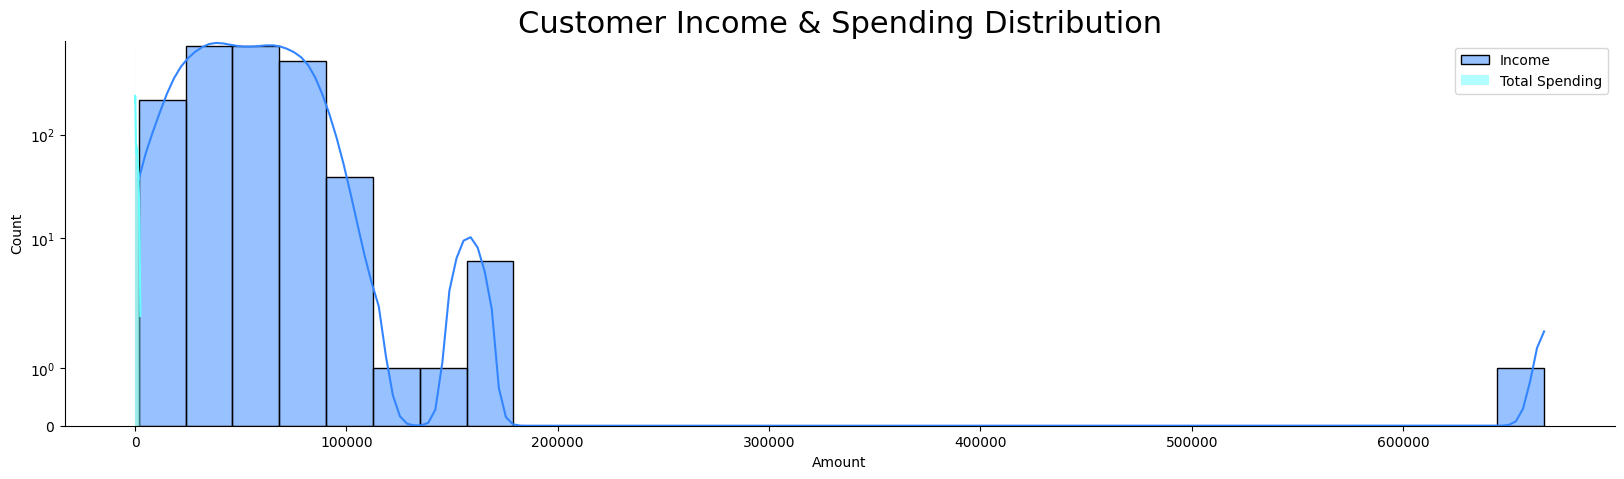

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Customer Income vs Spending Distribution")

plt.figure(figsize=(20, 5))

sns.histplot(
    df["Income"],
    color="#3385ff",
    kde=True,
    bins=30,
    label="Income"
)

sns.histplot(
    df["Total_Spending"],
    color="#66ffff",
    kde=True,
    bins=30,
    label="Total Spending"
)

plt.yscale("symlog")
plt.title("Customer Income & Spending Distribution", fontsize=22)
plt.xlabel("Amount")
plt.ylabel("Count")
plt.legend()
sns.despine()
plt.show()


In [6]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spending'],
      dtype='object')

In [7]:
df.dtypes


ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [8]:
features = df[["Income", "Age", "Total_Spending","Recency"]]
features.head()


,Income,Age,Total_Spending,Recency
0,58138.0,67,1617,58
1,46344.0,70,27,38
2,71613.0,59,776,26
3,26646.0,40,53,26
4,58293.0,43,422,94


In [9]:
features["Income"].fillna(features["Income"].median(), inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(features)

scaled_df = pd.DataFrame(
    scaled_data,
    columns=features.columns
)

scaled_df.head()


C:\Users\anuradha singh\AppData\Local\Temp\ipykernel_13264\1836085563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features["Income"].fillna(features["Income"].median(), inplace=True)
C:\Users\anuradha singh\AppData\Local\Temp\ipykernel_13264\1836085563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Income"].fillna(featur

,Income,Age,Total_Spending,Recency
0,0.235696,0.985345,1.679417,0.307039
1,-0.235454,1.235733,-0.961275,-0.383664
2,0.773999,0.317643,0.282673,-0.798086
3,-1.022355,-1.268149,-0.918094,-0.798086
4,0.241888,-1.017761,-0.305254,1.550305


In [10]:
scaled_df.to_csv("../data/scaled_features.csv", index=False)
